In [1]:
#Importing Necessary Liberaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [2]:
#Reading  defects csv file
defect_df = pd.read_csv("NetCracker TMS 2023-07-22T08_01_52+0100.csv")

C:\Users\mach1220\AppData\Local\Temp\4\ipykernel_3748\2983118482.py:2: DtypeWarning: Columns (25,26,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  defect_df = pd.read_csv("NetCracker TMS 2023-07-22T08_01_52+0100.csv")


<H1>Feature Engineering</H1>

In [3]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ticket key                             30777 non-null  object 
 1   Ticket id                              30777 non-null  int64  
 2   Parent id                              7857 non-null   float64
 3   Summary                                30777 non-null  object 
 4   Custom field (External Issue ID)       14361 non-null  object 
 5   Priority                               30777 non-null  object 
 6   Labels                                 26252 non-null  object 
 7   Labels.1                               25178 non-null  object 
 8   Labels.2                               24189 non-null  object 
 9   Labels.3                               20310 non-null  object 
 10  Labels.4                               15258 non-null  object 
 11  La

In [5]:
#Remove colums not needed for your analysis- Here removed columns starting wiht similar names
cols_to_drop = [col for col in defect_df.columns if col.startswith(('Labels','Component/s.','Fix Version/s.'))]
defect_df = defect_df.drop(columns=cols_to_drop)
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ticket key                             30777 non-null  object 
 1   Ticket id                              30777 non-null  int64  
 2   Parent id                              7857 non-null   float64
 3   Summary                                30777 non-null  object 
 4   Custom field (External Issue ID)       14361 non-null  object 
 5   Priority                               30777 non-null  object 
 6   Status                                 30777 non-null  object 
 7   Assignee                               30683 non-null  object 
 8   Component/s                            30777 non-null  object 
 9   Fix Version/s                          10617 non-null  object 
 10  Custom field (Target Build)            7165 non-null   object 
 11  Cr

In [6]:
#Remove colums not needed for your analysis
defect_df = defect_df.drop(['Ticket id','Parent id','Summary','Custom field (Target Build)','Custom field (Environment Type)','Custom field (Pending Info From)','Custom field (Epic Link)','Custom field (External Due Date)','Custom field (Last Commit Number)','Due Date','Creator','Resolved'],axis=1)
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Ticket key                             30777 non-null  object
 1   Custom field (External Issue ID)       14361 non-null  object
 2   Priority                               30777 non-null  object
 3   Status                                 30777 non-null  object
 4   Assignee                               30683 non-null  object
 5   Component/s                            30777 non-null  object
 6   Fix Version/s                          10617 non-null  object
 7   Created                                30777 non-null  object
 8   Updated                                30777 non-null  object
 9   Resolution                             29666 non-null  object
 10  Custom field (Root Cause Description)  20688 non-null  object
dtypes: object(11)
m

In [7]:
#checking the statistice of External issues(INC/PBI)  Vs internal issue were external issue ID is missing are not part of the defects
print('Total Tickets: ', len(defect_df))
print ('Total Tickets missing external issue ID :', defect_df['Custom field (External Issue ID)'].isnull().sum())
print ('Total Tickets having external issue ID  :', len(defect_df) - defect_df['Custom field (External Issue ID)'].isnull().sum())

Total Tickets:  30777
Total Tickets missing external issue ID : 16416
Total Tickets having external issue ID  : 14361


In [8]:
#Converting Created date columns in datetime format
defect_df['Created'] = pd.to_datetime(defect_df['Created'])


In [9]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Ticket key                             30777 non-null  object        
 1   Custom field (External Issue ID)       14361 non-null  object        
 2   Priority                               30777 non-null  object        
 3   Status                                 30777 non-null  object        
 4   Assignee                               30683 non-null  object        
 5   Component/s                            30777 non-null  object        
 6   Fix Version/s                          10617 non-null  object        
 7   Created                                30777 non-null  datetime64[ns]
 8   Updated                                30777 non-null  object        
 9   Resolution                             29666 non-null  object

In [10]:
#Add New column External defect True / false to signify External or Internal Defects
mask = defect_df['Custom field (External Issue ID)'].str.contains('INC|PBI|WO')== True 
defect_df['External_defect'] = mask.astype('category')


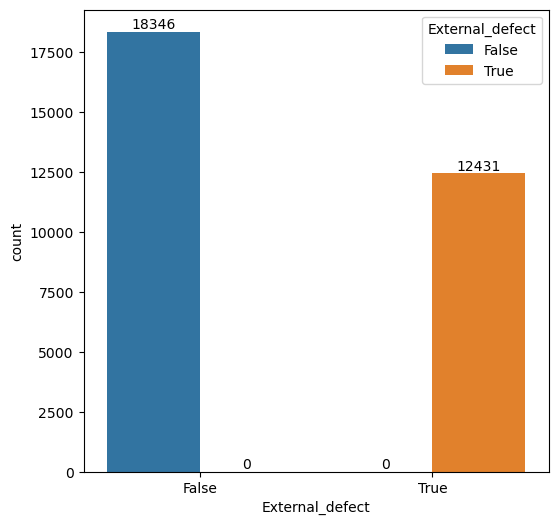

In [11]:
#show the break up of External and internal Defects

# Set the figure size and the number of categories to display
plt.figure(figsize=(6, 6))  # Adjust the figure size as desired

# Plot the countplot
ax = sns.countplot(data=defect_df, x='External_defect', hue='External_defect')

# Add count values to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

# Show the plot
plt.show()


In [12]:
#Create addtional columns for Month and year 
defect_df['created_month'] = defect_df['Created'].dt.strftime('%B')
defect_df['created_Year'] = defect_df['Created'].dt.strftime('%Y')
defect_df['created_Mon_Yr'] = defect_df['Created'].dt.strftime('%B') + '-' + defect_df['Created'].dt.strftime('%Y')
defect_df['created_Mon_Yr'] = pd.to_datetime(defect_df['created_Mon_Yr'])
# defect_df['created_Mon_Yr'] = defect_df['created_Mon_Yr'].dt.strftime("%B-%Y")
# defect_df.drop(defect_df['created_month','created_Year'])
defect_df.head()

Ticket key Custom field (External Issue ID)  Priority    Status  \
0  TFNUK-921897                              NaN    Normal  Resolved   
1  TFNUK-921877                  INC000005928417    Normal      Open   
2  TFNUK-921876                  INC000005915722  Critical      Open   
3  TFNUK-921874                  INC000005922991    Normal      Open   
4  TFNUK-921873                  INC000005925391    Normal      Open   

   Assignee             Component/s Fix Version/s             Created  \
0  hech0322                  MS_CIM           NaN 2023-07-22 07:39:00   
1  veko0815          MS_Order Entry           NaN 2023-07-22 00:34:00   
2  veko0815          MS_Order Entry           NaN 2023-07-22 00:17:00   
3  desi1016                  MS_CBM           NaN 2023-07-21 22:51:00   
4  vlfu1219  MS_Notification Engine           NaN 2023-07-21 22:11:00   

             Updated Resolution Custom field (Root Cause Description)  \
0  22/Jul/23 7:42 AM      Fixed                                   NaN   
1  22/Jul/23 6:02 AM        NaN                                   NaN   
2  22/Jul/23 6:02 AM        NaN                                   NaN   
3  22/Jul/23 6:02 AM        NaN                                   NaN   
4  22/Jul/23 6:02 AM        NaN                                   NaN   

  External_defect created_month created_Year created_Mon_Yr  
0           False          July         2023     2023-07-01  
1            True          July         2023     2023-07-01  
2            True          July         2023     2023-07-01  
3            True          July         2023     2023-07-01  
4            True          July         2023     2023-07-01

In [13]:
# print(defect_df['Ticket key'].notnull())
# #Create new COlumne Incoming in dataframe
mask = defect_df['Ticket key'].notnull()== True 
defect_df['Incoming'] = mask.astype(int)
defect_df.head()

Ticket key Custom field (External Issue ID)  Priority    Status  \
0  TFNUK-921897                              NaN    Normal  Resolved   
1  TFNUK-921877                  INC000005928417    Normal      Open   
2  TFNUK-921876                  INC000005915722  Critical      Open   
3  TFNUK-921874                  INC000005922991    Normal      Open   
4  TFNUK-921873                  INC000005925391    Normal      Open   

   Assignee             Component/s Fix Version/s             Created  \
0  hech0322                  MS_CIM           NaN 2023-07-22 07:39:00   
1  veko0815          MS_Order Entry           NaN 2023-07-22 00:34:00   
2  veko0815          MS_Order Entry           NaN 2023-07-22 00:17:00   
3  desi1016                  MS_CBM           NaN 2023-07-21 22:51:00   
4  vlfu1219  MS_Notification Engine           NaN 2023-07-21 22:11:00   

             Updated Resolution Custom field (Root Cause Description)  \
0  22/Jul/23 7:42 AM      Fixed                                   NaN   
1  22/Jul/23 6:02 AM        NaN                                   NaN   
2  22/Jul/23 6:02 AM        NaN                                   NaN   
3  22/Jul/23 6:02 AM        NaN                                   NaN   
4  22/Jul/23 6:02 AM        NaN                                   NaN   

  External_defect created_month created_Year created_Mon_Yr  Incoming  
0           False          July         2023     2023-07-01         1  
1            True          July         2023     2023-07-01         1  
2            True          July         2023     2023-07-01         1  
3            True          July         2023     2023-07-01         1  
4            True          July         2023     2023-07-01         1

In [14]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Ticket key                             30777 non-null  object        
 1   Custom field (External Issue ID)       14361 non-null  object        
 2   Priority                               30777 non-null  object        
 3   Status                                 30777 non-null  object        
 4   Assignee                               30683 non-null  object        
 5   Component/s                            30777 non-null  object        
 6   Fix Version/s                          10617 non-null  object        
 7   Created                                30777 non-null  datetime64[ns]
 8   Updated                                30777 non-null  object        
 9   Resolution                             29666 non-null  object

<H2>Exploratory data Analysis</H2>

In [15]:
print(defect_df['created_Mon_Yr'].value_counts().sort_index(ascending=False))

2023-07-01    1007
2023-06-01    1462
2023-05-01    1605
2023-04-01    1284
2023-03-01    1714
2023-02-01    1382
2023-01-01    1176
2022-12-01    1217
2022-11-01    1454
2022-10-01    1097
2022-09-01    1114
2022-08-01     968
2022-07-01    1170
2022-06-01    1080
2022-05-01     750
2022-04-01    1158
2022-03-01    1136
2022-02-01     578
2022-01-01     600
2021-12-01     565
2021-11-01     714
2021-10-01     828
2021-09-01     518
2021-08-01     590
2021-07-01     373
2021-06-01     430
2021-05-01     671
2021-04-01     576
2021-03-01     479
2021-02-01     233
2021-01-01     406
2020-12-01     496
2020-11-01     372
2020-10-01     365
2020-09-01     278
2020-08-01     227
2020-07-01     259
2020-06-01     119
2020-05-01      67
2020-04-01      75
2020-03-01      15
2020-02-01      33
2020-01-01      11
2019-12-01      52
2019-11-01      16
2019-10-01      16
2019-09-01      12
2019-08-01       4
2019-07-01       7
2019-06-01       7
2019-05-01       6
2019-04-01       2
2019-03-01  

In [16]:
# Incoming_pivot_df = pd.pivot_table(defect_df, values=['created_Mon_Yr','Incoming'], aggfunc='sum')
incoming_pivot_df = defect_df.groupby('created_Mon_Yr').agg({'Incoming':'sum'})

# defect_df['created_Mon_Yr'] = defect_df['created_Mon_Yr'].astype('category')
# Incoming_pivot_df = defect_df[['created_Mon_Yr','Incoming']]
# Incoming_pivot_df.reset_index
incoming_pivot_df.head(54).sort_index(ascending=False)
# incoming_pivot_df.info()

Incoming
created_Mon_Yr          
2023-06-01          1462
2023-05-01          1605
2023-04-01          1284
2023-03-01          1714
2023-02-01          1382
2023-01-01          1176
2022-12-01          1217
2022-11-01          1454
2022-10-01          1097
2022-09-01          1114
2022-08-01           968
2022-07-01          1170
2022-06-01          1080
2022-05-01           750
2022-04-01          1158
2022-03-01          1136
2022-02-01           578
2022-01-01           600
2021-12-01           565
2021-11-01           714
2021-10-01           828
2021-09-01           518
2021-08-01           590
2021-07-01           373
2021-06-01           430
2021-05-01           671
2021-04-01           576
2021-03-01           479
2021-02-01           233
2021-01-01           406
2020-12-01           496
2020-11-01           372
2020-10-01           365
2020-09-01           278
2020-08-01           227
2020-07-01           259
2020-06-01           119
2020-05-01            67
2020-04-01            75
2020-03-01            15
2020-02-01            33
2020-01-01            11
2019-12-01            52
2019-11-01            16
2019-10-01            16
2019-09-01            12
2019-08-01             4
2019-07-01             7
2019-06-01             7
2019-05-01             6
2019-04-01             2
2019-03-01             1
2018-11-01             1
2018-10-01             1

In [17]:
incoming_pivot_df = incoming_pivot_df.drop(incoming_pivot_df.index[-1])
incoming_pivot_df.head(53).sort_index(ascending=False)

Incoming
created_Mon_Yr          
2023-05-01          1605
2023-04-01          1284
2023-03-01          1714
2023-02-01          1382
2023-01-01          1176
2022-12-01          1217
2022-11-01          1454
2022-10-01          1097
2022-09-01          1114
2022-08-01           968
2022-07-01          1170
2022-06-01          1080
2022-05-01           750
2022-04-01          1158
2022-03-01          1136
2022-02-01           578
2022-01-01           600
2021-12-01           565
2021-11-01           714
2021-10-01           828
2021-09-01           518
2021-08-01           590
2021-07-01           373
2021-06-01           430
2021-05-01           671
2021-04-01           576
2021-03-01           479
2021-02-01           233
2021-01-01           406
2020-12-01           496
2020-11-01           372
2020-10-01           365
2020-09-01           278
2020-08-01           227
2020-07-01           259
2020-06-01           119
2020-05-01            67
2020-04-01            75
2020-03-01            15
2020-02-01            33
2020-01-01            11
2019-12-01            52
2019-11-01            16
2019-10-01            16
2019-09-01            12
2019-08-01             4
2019-07-01             7
2019-06-01             7
2019-05-01             6
2019-04-01             2
2019-03-01             1
2018-11-01             1
2018-10-01             1

<Figure size 1000x1000 with 0 Axes>

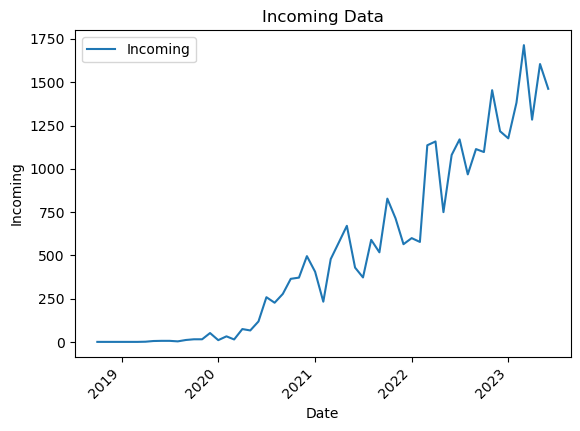

In [18]:
plt.figure(figsize=(10, 10)) 
# plt.plot(incoming_pivot_df.index, incoming_pivot_df['Incoming'])
# Display the plot
incoming_pivot_df.plot()
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Incoming')
plt.title('Incoming Data')
plt.xticks(rotation=45)

plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(incoming_pivot_df['Incoming'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations Used: %f' % result[3])

ADF Statistic: 1.026687
p-value: 0.994540
Lags Used: 8.000000
Number of Observations Used: 45.000000


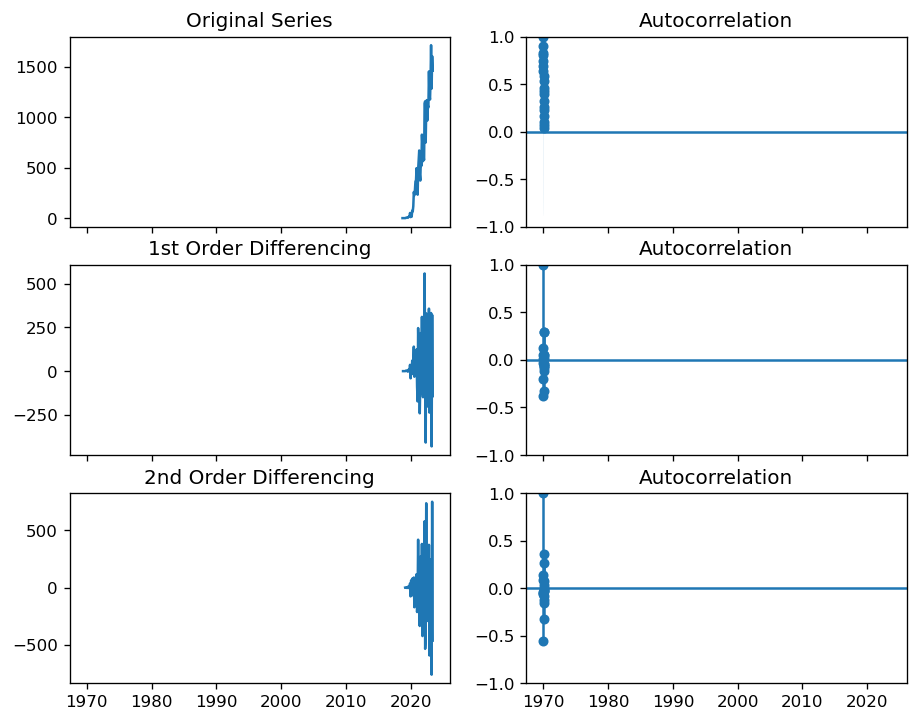

In [20]:
#Differenecing 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(incoming_pivot_df.Incoming); axes[0, 0].set_title('Original Series')
plot_acf(incoming_pivot_df.Incoming, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(incoming_pivot_df.Incoming.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(incoming_pivot_df.Incoming.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(incoming_pivot_df.Incoming.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(incoming_pivot_df.Incoming.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


In [21]:
from pmdarima import auto_arima

# Your code for data preparation and other steps

# Use auto_arima to automatically select the best parameters
model = auto_arima(incoming_pivot_df.Incoming, start_p=1, start_q=1,
                   max_p=5, max_d=2, max_q=5,
                   seasonal=False, trace=True)
# Print the best model's parameters
print("Best parameters (p, d, q):", model.order)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=686.737, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=703.822, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=697.450, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=684.743, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=703.075, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=686.731, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=693.554, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.464 seconds
Best parameters (p, d, q): (0, 1, 1)


In [22]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(incoming_pivot_df.Incoming,order=(0,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Incoming   No. Observations:                   54
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -344.777
Date:                Tue, 25 Jul 2023   AIC                            693.554
Time:                        10:46:11   BIC                            697.495
Sample:                             0   HQIC                           695.069
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4891      0.097     -5.066      0.000      -0.678      -0.300
sigma2      2.605e+04   3697.625      7.044      0.000    1.88e+04    3.33e+04
Ljung-Box (L1) (Q):                   1.19   Jarque-

C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

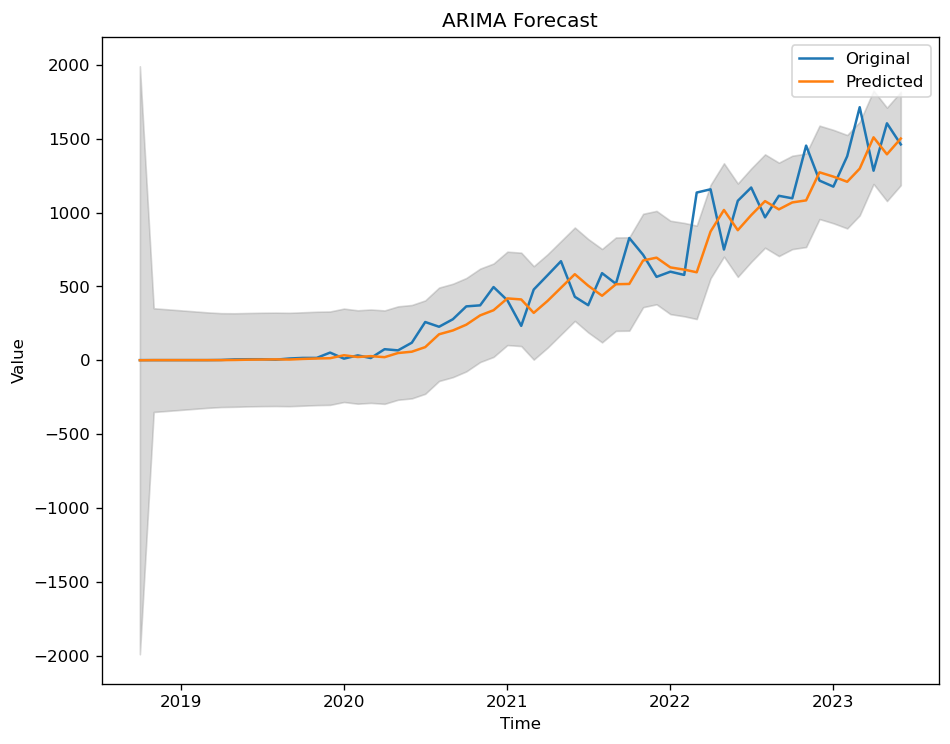

In [25]:
#Predict and plot the graph
# Fit the ARIMA model and obtain forecasts
# model = ARIMA(your_data, order=(p, d, q))
# model_fit = model.fit()
# Set the start index for predictions
# start_index =(incoming_pivot_df[50])  # Replace your_start_date with the desired start date

# predictions = model_fit.get_prediction(start=incoming_pivot_df.index[40],end=incoming_pivot_df.index[52],dynamic=False)  # Replace num_steps with the desired number of forecast steps
predictions = model_fit.get_prediction()
predicted_values = np.round(predictions.predicted_mean)
confidence_interval = predictions.conf_int()

# Plot the predicted values
plt.plot(incoming_pivot_df, label='Original')
plt.plot(predicted_values, label='Predicted')

# Plot confidence intervals
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.3)

# Customize the plot as needed
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()

# Display the plot
plt.show()


In [26]:
#Measurement of Model performance wiht metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error,r2_score


In [27]:
#Measurement of Model performance wiht metrics
# Calculate the Mean absolute Error
def  evaluate_model_performance(predicted_values, actual_values):

    mae = mean_absolute_error(incoming_pivot_df, predicted_values)
    print('Mean absolute Error by method (MAE) : ' , mae)

    # Calculate the Mean Squared Error and the Mean Squared Error
    mse = mean_squared_error(incoming_pivot_df, predicted_values)
    print('mean_squared_error by method(MSE) : ' , mse)

    print('Root mean_squared_error by method(RMSE) : ' , np.sqrt(mse))

    # Calculate the MAPE
    mape = mean_absolute_percentage_error(incoming_pivot_df, predicted_values)
    print('Mean Absolute Percentage Error (MAPE):: ' , mape)

    # Calculate the R-squared
    r2 = r2_score(incoming_pivot_df, predicted_values)
    print('R squared_error by method : ' , r2)
    

In [28]:
#Check the performance of model 
evaluate_model_performance(predicted_values,incoming_pivot_df)

Mean absolute Error by method (MAE) :  108.4074074074074
mean_squared_error by method(MSE) :  25535.222222222223
Root mean_squared_error by method(RMSE) :  159.79744122551594
Mean Absolute Percentage Error (MAPE)::  0.33925176142115643
R squared_error by method :  0.9015709455549159


In [29]:
# print(predicted_values + " : " + incoming_pivot_df)

print(f"Actual values :  {incoming_pivot_df} \n Vs Predicted values {predicted_values } \nVs {confidence_interval} ")

Actual values :                  Incoming
created_Mon_Yr          
2018-10-01             1
2018-11-01             1
2019-03-01             1
2019-04-01             2
2019-05-01             6
2019-06-01             7
2019-07-01             7
2019-08-01             4
2019-09-01            12
2019-10-01            16
2019-11-01            16
2019-12-01            52
2020-01-01            11
2020-02-01            33
2020-03-01            15
2020-04-01            75
2020-05-01            67
2020-06-01           119
2020-07-01           259
2020-08-01           227
2020-09-01           278
2020-10-01           365
2020-11-01           372
2020-12-01           496
2021-01-01           406
2021-02-01           233
2021-03-01           479
2021-04-01           576
2021-05-01           671
2021-06-01           430
2021-07-01           373
2021-08-01           590
2021-09-01           518
2021-10-01           828
2021-11-01           714
2021-12-01           565
2022-01-01           600
2022-02-

In [30]:
# #Forcasting Future Date incoming

# Get the forecast for future dates
forecast = model_fit.get_forecast(steps=2)

# Extract the forecasted values, confidence intervals, and the index of future dates
forecast_values = np.round(forecast.predicted_mean)
confidence_intervals = forecast.conf_int()

# Generate future dates based on the index of incoming_pivot_df
future_dates = pd.date_range(start=incoming_pivot_df.index[-1], periods=3, freq='M')[1:]

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(incoming_pivot_df.index, incoming_pivot_df['Incoming'], label='Actual')
plt.plot(future_dates, forecast_values, label='Forecast')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
print (future_dates)

DatetimeIndex(['2023-07-31', '2023-08-31'], dtype='datetime64[ns]', freq='M')


In [32]:
print(forecast_values)

54    1482.0
55    1482.0
Name: predicted_mean, dtype: float64


In [33]:
print(confidence_intervals)

    lower Incoming  upper Incoming
54     1165.317742     1797.952838
55     1126.419994     1836.850587


In [34]:
import joblib

# Save the ARIMA model to a file
joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']

In [35]:
# Load the ARIMA model from the file
loaded_model = joblib.load('arima_model.pkl')
# Now you can use the loaded_model for prediction or evaluating its performance on new data.
# For example:
# Replace 'steps' with the number of time steps to forecast
predicted_values = loaded_model.forecast(steps=2) 
# Function to evaluate model performance
evaluate_model_performance(predicted_values, incoming_pivot_df)  

print(f"Actual values :  {incoming_pivot_df} \n Vs Predicted values {predicted_values } \nVs {confidence_interval} ")

C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: Found input variables with inconsistent numbers of samples: [54, 2]